In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#### Data Dictionary

    𝗩𝗮𝗿𝗶𝗮𝗯𝗹𝗲	𝗗𝗲𝗳𝗶𝗻𝗶𝘁𝗶𝗼𝗻	                                  𝗞𝗲𝘆
    survival	Survival	                                  0 = No, 1 = Yes
    pclass	  Ticket class	                              1 = 1st, 2 = 2nd, 3 = 3rd
    sex	     Sex	
    Age	     Age in years	
    sibsp	   # of siblings / spouses aboard the Titanic	
    parch	   # of parents / children aboard the Titanic	
    ticket	  Ticket number	
    fare	    Passenger fare	
    cabin	   Cabin number	
    embarked    Port of Embarkation	                       C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived']]
df.head() #shifting the 'Survived' column to the end

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


• as seen above 'Age', 'Cabin' and 'Embarked' have null values

In [6]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

    • 'Cabin' has the highest number of null values with only 204 being non-null values. So, filling the null values w/ the            mean would create a bias. Hence, dropping the column would be the most viable option.
    • 'Age' has 177 null values, so filling that column with the mean() of that column.
    • 'Embark' has 2 null values, filling those two values with the mean() of that column.

In [7]:
np.where(df['Embarked'].isnull())

(array([ 61, 829], dtype=int64),)

In [8]:
print (df['Embarked'][61],df['Embarked'][829])

nan nan


In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df.drop(['Cabin'],axis=1,inplace=True) #dropping cabin
df['Age'].fillna(df['Age'].mean(),inplace=True) #filling null Age values with the mean() 
df['Embarked'].fillna(value='S',inplace=True) #filling the Embarked column with the mode()

In [11]:
df.isnull().sum() 

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [12]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,13.002015,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


#### Visualization

<AxesSubplot:>

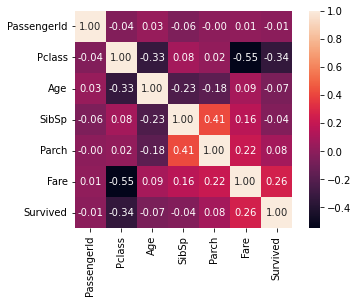

In [13]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',square=True)

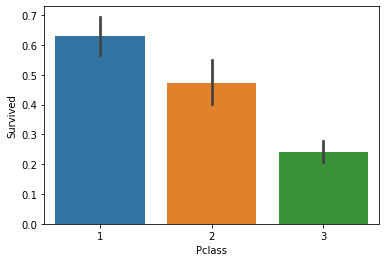

In [14]:
sns.barplot(x=df['Pclass'],y=df['Survived'])
plt.show()

- from the above graph we can say that people with 'ticket class=1' survived the most 

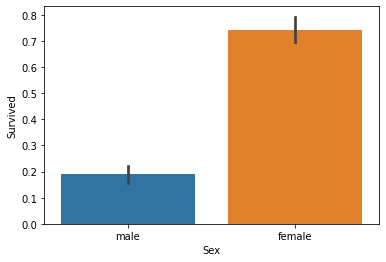

In [15]:
sns.barplot(x=df['Sex'],y=df['Survived'])
plt.show()

- from the above graph we can say that more number of females survived the wreck 

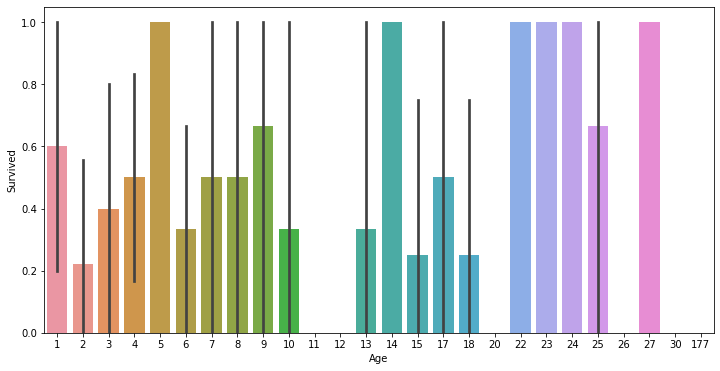

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Age'].value_counts(),y=df['Survived'])
plt.show()

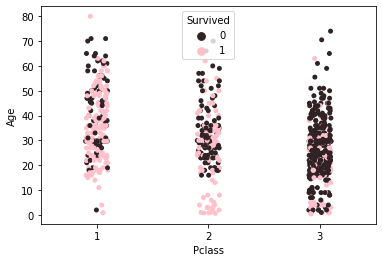

In [17]:
sns.stripplot(x=df['Pclass'],y=df['Age'],data=df[df['Sex']!='male'],hue=df['Survived'],color='pink')
plt.show()

- females with 1st class tickets had the highest chance of survival

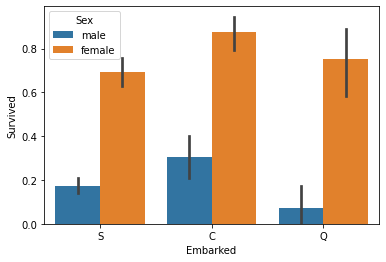

In [18]:
sns.barplot(x=df['Embarked'],y=df['Survived'],data=df,hue=df['Sex'])
plt.show()

- passengers boarding from C (Cherbourg) had a higher chance of surviving

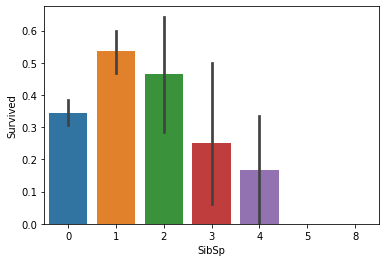

In [19]:
sns.barplot(x=df['SibSp'],y=df['Survived'],data=df)
plt.show() 

- families with 1 sibling/spouse survived the most

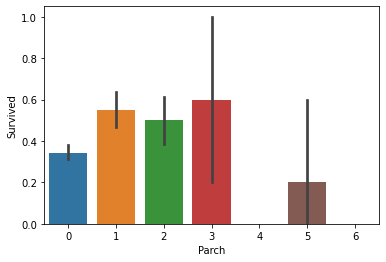

In [20]:
sns.barplot(x=df['Parch'],y=df['Survived'],data=df)
plt.show() 

- families with 3 members survived the most according to this graph

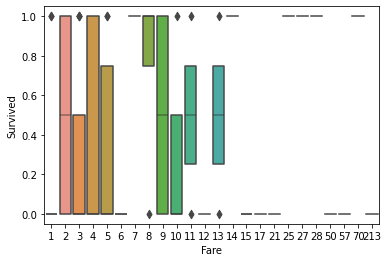

In [21]:
int_fares = df['Fare'].astype('int32')

sns.boxenplot(x=int_fares.value_counts(),y=df['Survived'],data=df)
plt.show() 

- we can assume with the help of this plot that 'fare' did not play a factor in deciding the survival of the passenger
- since 'passengerid' was just a code assigned to the passengers, we cannot link it to the survival of the passenger
- similarly, the 'name' also does not play a factor in the survival of the passenger

In [22]:
df.drop(df[['PassengerId','Name']],axis=1,inplace=True) #dropping the columns 'Name' and 'PassengerID'

In [23]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,1,female,35.0,1,0,113803,53.1000,S,1
4,3,male,35.0,0,0,373450,8.0500,S,0


#### Skewness 

In [24]:
df.skew()

Pclass     -0.630548
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Survived    0.478523
dtype: float64

- Skewness observed in SibSp, Parch and Fare column

#### Splitting data in X & Y 

In [25]:
x = df.drop(df[['Survived','Ticket']],axis=1)
y = df['Survived']

#### LabelEncoder() 

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in x.columns:
    x[i] = le.fit_transform(x[i])

In [27]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,28,1,0,18,2
1,0,0,52,1,0,207,0
2,2,0,34,0,0,41,2
3,0,0,48,1,0,189,2
4,2,1,48,0,0,43,2


#### train_test_split

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#### Model Building

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.preprocessing import LabelBinarizer

def roc_auc_score_(y_test,y_pred):
    LB = LabelBinarizer()
    LB_y_test = LB.fit_transform(y_test)
    LB_y_pred = LB.fit_transform(y_pred)
    return round(roc_auc_score(LB_y_test,LB_y_pred)*100,2)

In [31]:
#SupportVectorClassifier()
from sklearn.svm import SVC

svc = SVC()
svc_para={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'random_state':np.arange(1,51)}
gsCV_svc = GridSearchCV(svc,svc_para,cv=2,scoring='accuracy')
gsCV_svc.fit(x_train,y_train)
gsCV_svc.best_params_ 

{'kernel': 'linear', 'random_state': 1}

In [36]:
svc = SVC(random_state=1,kernel='linear')
svc.fit(x_train,y_train)
svc_y_pred = svc.predict(x_test)
svc_test_score = accuracy_score(y_test,svc_y_pred)

print ("Test Score:",round(svc_test_score*100,2),'%')

Test Score: 79.33 %


In [38]:
#RandomForestClassifier

rfc = RandomForestClassifier()
rfc_para = {'n_estimators':[100,200,300,400,500],'criterion':['gini','entropy','log_loss']}
gsCV_rfc = GridSearchCV(rfc,rfc_para,cv=3,scoring='accuracy')
gsCV_rfc.fit(x_train,y_train)
gsCV_rfc.best_params_

{'criterion': 'gini', 'n_estimators': 500}

In [39]:
rfc = RandomForestClassifier(n_estimators=500, criterion='gini')
rfc.fit(x_train,y_train)
rfc_y_pred = rfc.predict(x_test)
rfc_test_score = accuracy_score(y_test,rfc_y_pred)

print ("Test Score:",round(rfc_test_score*100,2),'%')

Test Score: 81.01 %


In [40]:
#DecisionTreeClassifier()

dtc = DecisionTreeClassifier()
dtc_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'random_state':range(1,101)}
gsCV_dtc = GridSearchCV(dtc,dtc_para,cv=3,scoring='accuracy')
gsCV_dtc.fit(x_train,y_train)
gsCV_dtc.best_params_

{'criterion': 'gini', 'random_state': 19, 'splitter': 'random'}

In [41]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=83,splitter='random')
dtc.fit(x_train,y_train)
dtc_y_pred = dtc.predict(x_test)
dtc_test_score = accuracy_score(y_test,dtc_y_pred)

print ("Test Score:",round(dtc_test_score*100,2),'%')

Test Score: 75.42 %


In [42]:
#BaggingClassifier()

bc = BaggingClassifier()
bc_para = {'n_estimators':[100,200,300,400,500]}
gsCV_bc = GridSearchCV(bc,bc_para,scoring='accuracy')
gsCV_bc.fit(x_train,y_train)
gsCV_bc.best_params_

{'n_estimators': 200}

In [43]:
bc = BaggingClassifier(n_estimators=46)
bc.fit(x_train,y_train)
bc_y_pred = bc.predict(x_test)
bc_test_score = accuracy_score(y_test,bc_y_pred)

print ("Test Score:",round(bc_test_score*100,2),'%')

Test Score: 80.45 %


In [44]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg_para = {'C':[1,10],'penalty':['l1','l2','elasticnet','none'],'random_state':[1,51],'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
gsCV_lg = GridSearchCV(lg,lg_para,cv=3,scoring='accuracy')
gsCV_lg.fit(x_train,y_train)
gsCV_lg.best_params_

{'C': 1, 'penalty': 'l2', 'random_state': 1, 'solver': 'lbfgs'}

In [45]:
lg = LogisticRegression(C=1,penalty='l2',random_state=1,solver='lbfgs')
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_score = accuracy_score(y_test,lg_pred)

print("Logistic Regression score:",round(lg_score*100,2),'%')

Logistic Regression score: 77.65 %


In [46]:
#GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_y_pred = gbc.predict(x_test)
gbc_test_score = accuracy_score(y_test,gbc_y_pred)

print ("Test Score:",round(gbc_test_score*100,2),'%')

Test Score: 82.68 %


In [47]:
#XGBClassifier()

xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
xgbc_y_pred = xgbc.predict(x_test)
xgbc_test_score = accuracy_score(y_test,xgbc_y_pred)

print ("Test Score:",round(xgbc_test_score*100,2),'%')

Test Score: 80.45 %


In [48]:
model_name = []
ROCAUC_score = []
CV = []
accuracy = []

models = {'BaggingClassifier': bc, 'SVC': svc, 'LogisticRegression': lg,'DecisionTreeClassifier': dtc, 
          'RandomForestClassifier': rfc,'GradientBoostingClassifier': gbc, 'XGBClassifier': xgbc}

for model in models.keys():
    models[model].fit(x_train, y_train)
    y_pred = models[model].predict(x_test)
    test_score = round(accuracy_score(y_test,y_pred)*100,2)
    roc_s = roc_auc_score_(y_test,y_pred)
    fpr,tpr,_ = roc_curve(y_test,y_pred)
    CVS = cross_val_score(models[model],x,y,cv=10,scoring='accuracy').mean()
    
    print ("-"*50)
    print ("Model Name:",model)
    model_name.append(model)
    print ("Test Score:",test_score,'%')
    accuracy.append(test_score)
    print ("ROC_AUC Score:",roc_s,'%')
    ROCAUC_score.append(roc_s)
    print ("CV Score:",(round(CVS*100,2)),'%')
    CV.append(round(CVS*100,2))

--------------------------------------------------
Model Name: BaggingClassifier
Test Score: 80.45 %
ROC_AUC Score: 80.25 %
CV Score: 82.05 %
--------------------------------------------------
Model Name: SVC
Test Score: 79.33 %
ROC_AUC Score: 78.21 %
CV Score: 78.67 %
--------------------------------------------------
Model Name: LogisticRegression
Test Score: 77.65 %
ROC_AUC Score: 76.57 %
CV Score: 79.46 %
--------------------------------------------------
Model Name: DecisionTreeClassifier
Test Score: 75.42 %
ROC_AUC Score: 75.34 %
CV Score: 77.67 %
--------------------------------------------------
Model Name: RandomForestClassifier
Test Score: 81.01 %
ROC_AUC Score: 80.98 %
CV Score: 81.38 %
--------------------------------------------------
Model Name: GradientBoostingClassifier
Test Score: 82.68 %
ROC_AUC Score: 81.48 %
CV Score: 82.61 %
--------------------------------------------------
Model Name: XGBClassifier
Test Score: 80.45 %
ROC_AUC Score: 80.53 %
CV Score: 80.58 %


In [49]:
titanic_df = pd.DataFrame({'Model Name':model_name,'Accuracy':accuracy,'ROC_AUC':ROCAUC_score,'CV':CV})
titanic_df.sort_values(by='Accuracy', ascending=False)

,Model Name,Accuracy,ROC_AUC,CV
5,GradientBoostingClassifier,82.68,81.48,82.61
4,RandomForestClassifier,81.01,80.98,81.38
0,BaggingClassifier,80.45,80.25,82.05
6,XGBClassifier,80.45,80.53,80.58
1,SVC,79.33,78.21,78.67
2,LogisticRegression,77.65,76.57,79.46
3,DecisionTreeClassifier,75.42,75.34,77.67


- the best model is the GradientBoositingClassifier with an accuracy of 82.68%.

#### Actual values vs Predicted values

In [52]:
actual_vs_predicted = pd.DataFrame({'Actual Values':y_test,'Predicted Values':gbc_y_pred})
actual_vs_predicted

,Actual Values,Predicted Values
869,1,1
360,0,0
873,0,0
407,1,1
826,0,1
...,...,...
489,1,1
263,0,0
151,1,1
795,0,0


#### Saving File 

In [50]:
import pickle

file = "Titanic_DataTrained"
pickle.dump(titanic_df,open(file,'wb'))